In [1]:
# Importing all the necessary libraries 

import pandas as pd  # Pandas is used for data manipulation and analysis. 
import numpy as np   # NumPy is fundamental for numerical computing. 
import seaborn as sns   # Seaborn is a statistical data visualization library based on matplotlib. 
import matplotlib.pyplot as plt   # Matplotlib is a comprehensive plotting library for creating a wide range of static, interactive, and animated visualizations in Python. 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings


# Ignore warnings in the notebook
warnings.filterwarnings('ignore')

In [2]:
# To view the first few rows of the dataset
Awareness_df = pd.read_csv('Cybersecurity Awareness.csv')
Awareness_df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q16,Q17,Q18,Q19,Q20,Q21,Q22_1,Q22_2,Q22_3,Q22_4
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,What challenges do people encounter regarding ...,What security benefits have you observed with ...,What suggestions do you have for improving the...,How would you rate your overall satisfaction w...,Do you recommend the continued use of MFA in y...,How likely are you to recommend MFA as a solut...,What additional cybersecurity measures do you ...,What additional cybersecurity measures do you ...,What additional cybersecurity measures do you ...,What additional cybersecurity measures do you ...
1,"{""ImportId"":""startDate"",""timeZone"":""Europe/Lon...","{""ImportId"":""endDate"",""timeZone"":""Europe/London""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID20""}","{""ImportId"":""QID21""}","{""ImportId"":""QID22""}","{""ImportId"":""QID23""}","{""ImportId"":""QID24""}","{""ImportId"":""QID25""}","{""ImportId"":""QID28_1""}","{""ImportId"":""QID28_2""}","{""ImportId"":""QID28_3""}","{""ImportId"":""QID28_4""}"
2,6/22/2024 3:38,6/22/2024 3:40,IP Address,85.255.234.169,100,119,TRUE,6/22/2024 3:40,R_8QGXZkAUFIGYJup,NaN,...,Time-consuming step,Reduced unauthorise Access,Improve User Interface,Satisfied,Yes,Likely,Agree,Agree,Agree,Agree
3,6/22/2024 8:54,6/22/2024 8:54,Survey Preview,NaN,100,13,TRUE,6/22/2024 8:54,R_878afbTwpIqdnkV,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/22/2024 17:44,6/22/2024 17:49,IP Address,85.255.234.169,100,286,TRUE,6/22/2024 17:49,R_2cSC3AonzMjA70B,NaN,...,Disruptions to workflow,Enhanced user accountability,Provide More Training,Very Satisfied,Yes,Likely,Agree,Agree,Agree,Agree


In [3]:
# Print the content of row 0
print(Awareness_df.iloc[0])

StartDate                                                       Start Date
EndDate                                                           End Date
Status                                                       Response Type
IPAddress                                                       IP Address
Progress                                                          Progress
Duration (in seconds)                                Duration (in seconds)
Finished                                                          Finished
RecordedDate                                                 Recorded Date
ResponseId                                                     Response ID
RecipientLastName                                      Recipient Last Name
RecipientFirstName                                    Recipient First Name
RecipientEmail                                             Recipient Email
ExternalReference                                  External Data Reference
LocationLatitude         

In [4]:
# To view the columns
Awareness_df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'QID32', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22_1', 'Q22_2', 'Q22_3',
       'Q22_4'],
      dtype='object')

In [5]:
# List of columns to remove
columns_to_remove = ['StartDate', 'EndDate', 'Status','Q22_2','Q22_3','Q22_4', 'Q6','IPAddress', 'Progress','Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail','ExternalReference','LocationLatitude','LocationLongitude','DistributionChannel','UserLanguage','QID32']


In [6]:
# Remove the specified columns
Awareness_df.drop(columns=columns_to_remove, inplace=True)

In [7]:
# Renaming the columns to make sense of the dataset
new_column_names = {
    'Q1': 'Age Group',
    'Q2': 'Gender',
    'Q3': 'Role in the Organisation',
    'Q4': 'Years of experience',
    'Q5': 'sector',
    'Q7': 'Cyberawareness',  
    'Q8': 'human error',
    'Q9': 'significant human factors',
    'Q10': 'Negligence Contributing factors',
    'Q11': 'observe employees',
    'Q12': 'Specific App or Tool Used',
    'Q13': 'multi-factor authent',
    'Q14': 'integrating MFA',
    'Q15': 'comfortable are you with using MFA',
    'Q16': 'challenges',
    'Q17': 'security benefits',
    'Q18': 'suggestions for improving',
    'Q19': 'overall satisfaction rate',
    'Q20': 'recommend the continued use of MFA',
    'Q21': 'likely are you to recommend MFA',
    'Q22_1': 'additional cybersecurity measures',
    
}

# Rename the columns
Awareness_Newdf = Awareness_df.rename(columns=new_column_names)

In [8]:
# view the first few rows of the  new dataset
Awareness_Newdf.head()

,Age Group,Gender,Role in the Organisation,Years of experience,sector,Cyberawareness,human error,significant human factors,Negligence Contributing factors,observe employees,...,multi-factor authent,integrating MFA,comfortable are you with using MFA,challenges,security benefits,suggestions for improving,overall satisfaction rate,recommend the continued use of MFA,likely are you to recommend MFA,additional cybersecurity measures
0,Age Group,Gender,Role in the Organisation,Years of experience in the current role,Which sector do you organization belong to?,Have you received any formal training on cyber...,How often does human error contributes to cybe...,What are the most significant human factors co...,To what extent do you agree that negligence is...,How frequently do you observe employees not fo...,...,How familiar are you with multi-factor authent...,Do you believe integrating MFA can significant...,How comfortable are you with using MFA for you...,What challenges do people encounter regarding ...,What security benefits have you observed with ...,What suggestions do you have for improving the...,How would you rate your overall satisfaction w...,Do you recommend the continued use of MFA in y...,How likely are you to recommend MFA as a solut...,What additional cybersecurity measures do you ...
1,"{""ImportId"":""QID1""}","{""ImportId"":""QID3""}","{""ImportId"":""QID6""}","{""ImportId"":""QID7""}","{""ImportId"":""QID9""}","{""ImportId"":""QID12""}","{""ImportId"":""QID13""}","{""ImportId"":""QID29""}","{""ImportId"":""QID14""}","{""ImportId"":""QID15""}",...,"{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID21""}","{""ImportId"":""QID22""}","{""ImportId"":""QID23""}","{""ImportId"":""QID24""}","{""ImportId"":""QID25""}","{""ImportId"":""QID28_1""}"
2,35-44,Female,General Employee,4-6 years,Government,No,Often,Negligence with security practices,Agree,Occassionally,...,Familiar,Agree,Comfortable,Time-consuming step,Reduced unauthorise Access,Improve User Interface,Satisfied,Yes,Likely,Agree
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35-44,Male,General Employee,Less than 1 year,Other (Please Specify),No,Often,Negligence with security practices,Agree,Occassionally,...,Familiar,Agree,Comfortable,Disruptions to workflow,Enhanced user accountability,Provide More Training,Very Satisfied,Yes,Likely,Agree


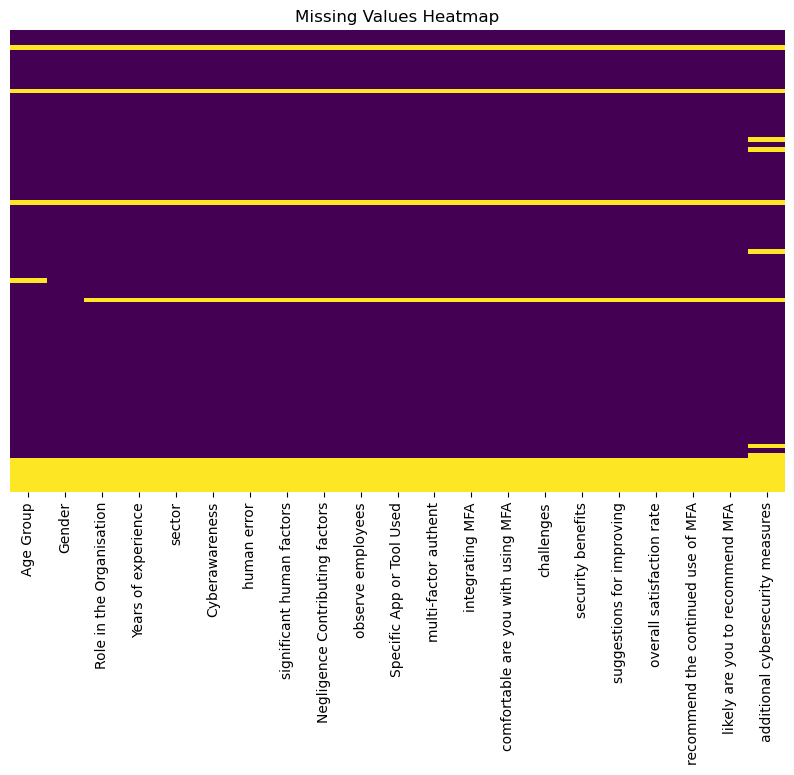

In [9]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(Awareness_Newdf.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
# Check for Missing Values
Awareness_Newdf.isna().sum()

Age Group                             11
Gender                                10
Role in the Organisation              11
Years of experience                   11
sector                                11
Cyberawareness                        11
human error                           11
significant human factors             11
Negligence Contributing factors       11
observe employees                     11
Specific App or Tool Used             11
multi-factor authent                  11
integrating MFA                       11
comfortable are you with using MFA    11
challenges                            11
security benefits                     11
suggestions for improving             11
overall satisfaction rate             11
recommend the continued use of MFA    11
likely are you to recommend MFA       11
additional cybersecurity measures     16
dtype: int64

In [11]:
# Investigating the columns with Nan values to get insight if there is NaN and how it will be handled 
Awareness_Newdf[Awareness_Newdf["Age Group"].isna()]

,Age Group,Gender,Role in the Organisation,Years of experience,sector,Cyberawareness,human error,significant human factors,Negligence Contributing factors,observe employees,...,multi-factor authent,integrating MFA,comfortable are you with using MFA,challenges,security benefits,suggestions for improving,overall satisfaction rate,recommend the continued use of MFA,likely are you to recommend MFA,additional cybersecurity measures
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,Male,Others (please specify),7-10 years,Other (Please Specify),No,Occassionally,Negligence with security practices,Agree,Occassionally,...,Unfamiliar,Neutral,Neutral,Other (Please Specify),Other (Please Specify),Other (Please Specify),Neutral,Yes,Very Likely,Strongly Agree
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Fill missing values with the mode of each column
for col in Awareness_Newdf.columns:
    # Calculate the mode of the column
    mode_value = Awareness_Newdf[col].mode()
    
    # Check if mode_value is not empty
    if not mode_value.empty:
        # Fill missing values with the mode
        Awareness_Newdf[col].fillna(mode_value[0], inplace=True)

# Display the updated DataFrame
Awareness_Newdf.head()

,Age Group,Gender,Role in the Organisation,Years of experience,sector,Cyberawareness,human error,significant human factors,Negligence Contributing factors,observe employees,...,multi-factor authent,integrating MFA,comfortable are you with using MFA,challenges,security benefits,suggestions for improving,overall satisfaction rate,recommend the continued use of MFA,likely are you to recommend MFA,additional cybersecurity measures
0,Age Group,Gender,Role in the Organisation,Years of experience in the current role,Which sector do you organization belong to?,Have you received any formal training on cyber...,How often does human error contributes to cybe...,What are the most significant human factors co...,To what extent do you agree that negligence is...,How frequently do you observe employees not fo...,...,How familiar are you with multi-factor authent...,Do you believe integrating MFA can significant...,How comfortable are you with using MFA for you...,What challenges do people encounter regarding ...,What security benefits have you observed with ...,What suggestions do you have for improving the...,How would you rate your overall satisfaction w...,Do you recommend the continued use of MFA in y...,How likely are you to recommend MFA as a solut...,What additional cybersecurity measures do you ...
1,"{""ImportId"":""QID1""}","{""ImportId"":""QID3""}","{""ImportId"":""QID6""}","{""ImportId"":""QID7""}","{""ImportId"":""QID9""}","{""ImportId"":""QID12""}","{""ImportId"":""QID13""}","{""ImportId"":""QID29""}","{""ImportId"":""QID14""}","{""ImportId"":""QID15""}",...,"{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID21""}","{""ImportId"":""QID22""}","{""ImportId"":""QID23""}","{""ImportId"":""QID24""}","{""ImportId"":""QID25""}","{""ImportId"":""QID28_1""}"
2,35-44,Female,General Employee,4-6 years,Government,No,Often,Negligence with security practices,Agree,Occassionally,...,Familiar,Agree,Comfortable,Time-consuming step,Reduced unauthorise Access,Improve User Interface,Satisfied,Yes,Likely,Agree
3,35-44,Male,IT Professional,7-10 years,Other (Please Specify),No,Often,Negligence with security practices,Agree,Frequently,...,Familiar,Agree,Comfortable,User resistance due to complexity,Reduced unauthorise Access,Provide More Training,Satisfied,Yes,Very Likely,Agree
4,35-44,Male,General Employee,Less than 1 year,Other (Please Specify),No,Often,Negligence with security practices,Agree,Occassionally,...,Familiar,Agree,Comfortable,Disruptions to workflow,Enhanced user accountability,Provide More Training,Very Satisfied,Yes,Likely,Agree


In [13]:
# Remove the first row
Awareness_Newdf = Awareness_Newdf.drop(1)


In [14]:
# Reset the index after dropping the first row
Awareness_Newdf = Awareness_Newdf.reset_index(drop=True)

In [15]:
# Replace the current column headers with the data from the new first row (original second row)
Awareness_Newdf.columns = Awareness_Newdf.iloc[0]


In [16]:
# Drop the new first row which is now redundant
Awareness_Newdf = Awareness_Newdf.drop(0)

In [17]:
# Reset the index again after dropping the new first row
Awareness_Newdf = Awareness_Newdf.reset_index(drop=True)
Awareness_Newdf.head()

,Age Group,Gender,Role in the Organisation,Years of experience in the current role,Which sector do you organization belong to?,Have you received any formal training on cybersecurity in the past year?,How often does human error contributes to cybersecurity incidents in the organization?,What are the most significant human factors contributing to cybersecurity breaches in your organisation? Please select one,To what extent do you agree that negligence is a significant factor in cybersecurity breaches?,How frequently do you observe employees not following cybersecurity protocols?,...,How familiar are you with multi-factor authentication (MFA)?,Do you believe integrating MFA can significantly reduce cybersecurity risks?,How comfortable are you with using MFA for your work-related accounts?,What challenges do people encounter regarding MFA in the organization,What security benefits have you observed with the use of MFA?,What suggestions do you have for improving the usability of MFA in your organization?,How would you rate your overall satisfaction with MFA?,Do you recommend the continued use of MFA in your organisation?,How likely are you to recommend MFA as a solution to enhance cybersecurity in the organisation?,What additional cybersecurity measures do you think should be implemented in the organization? - Regular Training
0,35-44,Female,General Employee,4-6 years,Government,No,Often,Negligence with security practices,Agree,Occassionally,...,Familiar,Agree,Comfortable,Time-consuming step,Reduced unauthorise Access,Improve User Interface,Satisfied,Yes,Likely,Agree
1,35-44,Male,IT Professional,7-10 years,Other (Please Specify),No,Often,Negligence with security practices,Agree,Frequently,...,Familiar,Agree,Comfortable,User resistance due to complexity,Reduced unauthorise Access,Provide More Training,Satisfied,Yes,Very Likely,Agree
2,35-44,Male,General Employee,Less than 1 year,Other (Please Specify),No,Often,Negligence with security practices,Agree,Occassionally,...,Familiar,Agree,Comfortable,Disruptions to workflow,Enhanced user accountability,Provide More Training,Very Satisfied,Yes,Likely,Agree
3,25-34,Female,IT Professional,4-6 years,Other (Please Specify),No,Very Often,Lack of Awareness,Neutral,Very Frequently,...,Neutral,Agree,Very Uncomfortable,Time-consuming step,Improved data protection,Improve User Interface,Satisfied,Yes,Neutral,Agree
4,35-44,Male,General Employee,More than 10 years,Government,No,Often,Negligence with security practices,Agree,Occassionally,...,Neutral,Agree,Neutral,User resistance due to complexity,Improved data protection,Improve User Interface,Satisfied,Yes,Likely,Agree


In [18]:
# Check for Missing Values
Awareness_Newdf.isna().sum()

0
Age Group                                                                                                                     0
Gender                                                                                                                        0
Role in the Organisation                                                                                                      0
Years of experience in the current role                                                                                       0
Which sector do you organization belong to?                                                                                   0
Have you received any formal training on cybersecurity in the past year?                                                      0
How often does human error contributes to cybersecurity incidents in the organization?                                        0
What are the most significant human factors contributing to cybersecurity breaches in your organisatio

In [19]:
# Calculate Gender count
gender_counts = Awareness_Newdf['Gender'].value_counts()

# Calculate the percentage of females and males
total_count = gender_counts.sum()
female_percentage = (gender_counts['Female'] / total_count) * 100
male_percentage = (gender_counts['Male'] / total_count) * 100

# Print the percentages
print("Female percentage:", female_percentage)
print("Male percentage:", male_percentage)

Female percentage: 31.182795698924732
Male percentage: 68.81720430107528


In [20]:
# Ethical Considerations

# Anonymizing Data
# To protect the privacy of participants, all personal identifiers have been removed from the dataset.
# Any data that could potentially identify individuals has been anonymised to ensure confidentiality.

# Secure Participant Consent
# Prior to data collection, informed consent was obtained from all participants.
# Participants were informed about the purpose of the study, the nature of their involvement, 
# and their rights to withdraw at any time without any consequences.

# Handling Sensitive Data
# The dataset is stored in a secure environment with access restricted to authorized personnel only.
# Data analysis is performed on anonymized data to ensure that no personal information is disclosed.

print("Ethical considerations have been implemented to ensure the confidentiality and privacy of participants.")


Ethical considerations have been implemented to ensure the confidentiality and privacy of participants.


## EDA ANALYSIS

In [21]:
# Show DataFrame Columns
print(Awareness_Newdf.columns)

Index(['Age Group', 'Gender', 'Role in the Organisation',
       'Years of experience in the current role',
       'Which sector do you organization belong to?',
       'Have you received any formal training on cybersecurity in the past year?',
       'How often does human error contributes to cybersecurity incidents in the organization?',
       'What are the most significant human factors contributing to cybersecurity breaches in your organisation? Please select one',
       'To what extent do you agree that negligence is a significant factor in cybersecurity breaches?',
       'How frequently do you observe employees not following cybersecurity protocols?',
       'Does the organization currently use multi-factor authentication (MFA) for accessing systems?',
       'How familiar are you with multi-factor authentication (MFA)?',
       'Do you believe integrating MFA can significantly reduce cybersecurity risks?',
       'How comfortable are you with using MFA for your work-related a

In [22]:
# Drop rows with missing values in these columns
awareness_df = Awareness_Newdf.dropna()


# Analytic Questions 



Cybersecurity Awareness Level by Role
Question: "Have you received any formal training on cybersecurity in the past year?"

Improving MFA to Reduce Cybersecurity Risks
Question: "How familiar are you with multi-factor authentication (MFA)?"

Challenges with Current MFA
Question: "Do you believe integrating MFA can significantly reduce cybersecurity risks?"


Overall Satisfaction with Current MFA
Question: "What challenges do people encounter regarding MFA in the organisation?"

Suggestions for Improving Usability of MFA
Question: "How would you rate your overall satisfaction with MFA?"

Non-Compliance with Cybersecurity Guidelines
Question: "What suggestions do you have for improving the usability of MFA in your organisation?"

Contribution of Human Factors to Cybersecurity Breaches and Incident
Question: "How frequently do you observe employees not following cybersecurity protocols?"


Key Human Factors Affecting Cybersecurity
Question: "How often does human error contribute to cybersecurity incidents in the organisation?"


Cybersecurity Awareness Level Based on Formal Training
Question: "What are the most significant human factors contributing to cybersecurity breaches in your organisation? Please select one."

Distribution by Age Group and Gender
Question: "Have you received any formal training on cybersecurity in the past year?"


Questions:
"Age Group"
"Gender"


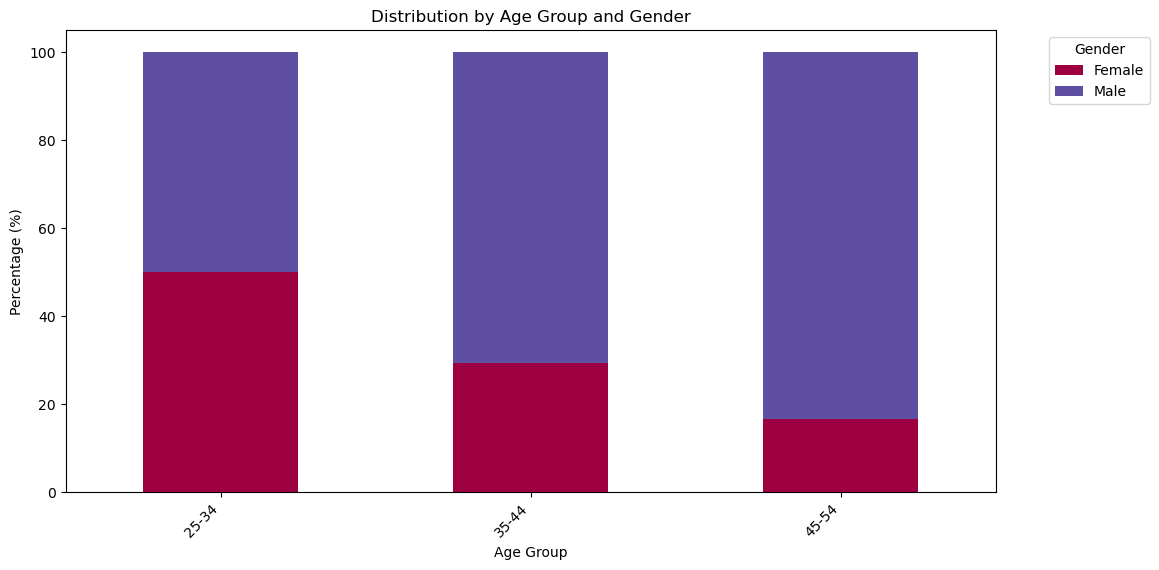

Gender        Female       Male
Age Group                      
25-34      50.000000  50.000000
35-44      29.333333  70.666667
45-54      16.666667  83.333333


In [23]:
# Age Group and Gender columns for visualisation
awareness_df = Awareness_Newdf[['Age Group', 'Gender']]

# Group by age and gender, then count occurrences
grouped_counts = awareness_df.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)

# Calculate percentages within each group
grouped_percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# Plot Distribution by Age Group and Gender
fig, ax = plt.subplots(figsize=(12, 6))
grouped_percentages.plot(kind='bar', stacked=True, ax=ax, colormap='Spectral')
plt.title('Distribution by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print percentages for analysis
print(grouped_percentages)



The figure shows the percentage distribution of respondents by age group and gender. The x-axis represents different age groups, while the y-axis shows the percentage of respondents within each age group. The bars differentiate between male and female respondents.

In the 25-34 age group, males and females are equally represented, each constituting 50%. In the 35-44 age group, males constitute approximately 70.67%, while females make up 29.33%. The 45-54 age group has males at 83.33% and females at 16.67%, showing the highest gender disparity.

The gender balance in the 25-34 age group suggests successful diversity and inclusion efforts among younger employees. The significant male dominance in the 35-44 and 45-54 age groups reflects historical hiring trends and potential retention issues for women. This disparity highlights the need for targeted retention strategies, such as mentorship programs and flexible work arrangements.

Addressing the gender disparity in older age groups is essential. Continued focus on diversity and inclusion initiatives can help maintain gender balance across all age groups. Equitable hiring and promotion practices are crucial for fostering a more inclusive workforce, supporting organisational success and innovation

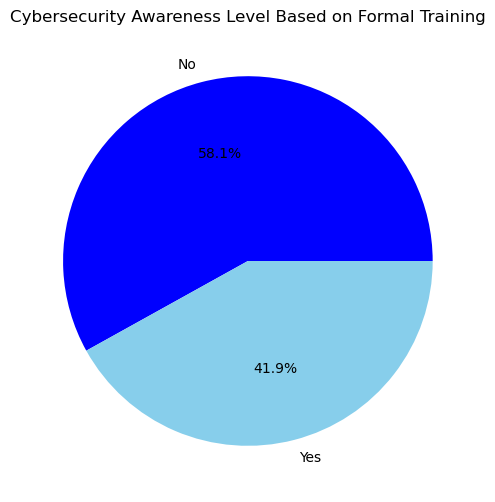

No: 58.06%
Yes: 41.94%


In [24]:
# Awareness Level using formal training for visualisation
cyber_awareness_df = Awareness_Newdf['Have you received any formal training on cybersecurity in the past year?']

# Compute Awareness Statistics
cyber_awareness_counts = cyber_awareness_df.value_counts()
cyber_awareness_percentages = (cyber_awareness_counts / cyber_awareness_counts.sum()) * 100

# Plot Cybersecurity Awareness Level as Pie Chart
plt.figure(figsize=(12, 6))
plt.pie(cyber_awareness_percentages, labels=cyber_awareness_percentages.index, autopct='%1.1f%%', colors=['blue', 'skyblue'])
plt.title('Cybersecurity Awareness Level Based on Formal Training')
plt.show()

# Print percentages for analysis
for awareness, percentage in cyber_awareness_percentages.items():
    print(f"{awareness}: {percentage:.2f}%")


The figure illustrates the distribution of respondents who received formal cybersecurity training in the past year. The chart shows two categories: "Yes" (received training) and "No" (did not receive training), with each segment's size representing the percentage of respondents.

58.1%, have not received formal cybersecurity training, indicating a significant portion of the workforce lacks essential training, potentially affecting their ability to handle cybersecurity threats effectively. Conversely, 41.9% have received formal training, suggesting that while many have undergone training, there is room for improvement to increase overall preparedness.

The lack of training for 58.1% of respondents highlights a vulnerability within the organisation, suggesting a need for more comprehensive cybersecurity training programs. Employees without formal training may be unaware of the latest threats and best practices, increasing susceptibility to breaches. The 41.9% who have received training represent a positive step towards better cybersecurity awareness and preparedness. These trained employees can act as advocates within their teams, promoting best practices and helping to refine future training efforts.

The organisation should consider implementing mandatory cybersecurity training for all employees to ensure a baseline level of awareness and competence. Offering regular refresher courses and advanced training sessions can maintain and improve the workforce's cybersecurity skills. Leveraging trained employees as internal champions for cybersecurity can foster a culture of security awareness and enhance the effectiveness of training programs.

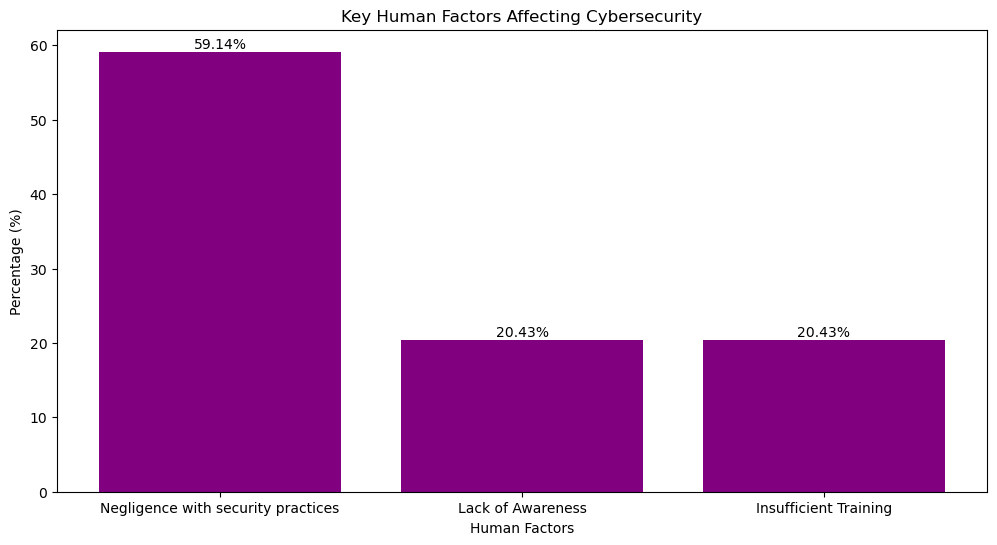

Negligence with security practices: 59.14%
Lack of Awareness: 20.43%
Insufficient Training: 20.43%


In [25]:
# Key human factor affecting cybersecurity visualisation
human_factors_df = Awareness_Newdf['What are the most significant human factors contributing to cybersecurity breaches in your organisation? Please select one']

# Compute key human factors statistics
human_factors_counts = human_factors_df.value_counts()
human_factors_percentages = (human_factors_counts / human_factors_counts.sum()) * 100

# Plot: Key Human Factors Affecting Cybersecurity
plt.figure(figsize=(12, 6))
bars = plt.bar(human_factors_percentages.index, human_factors_percentages.values, color='purple')
plt.title('Key Human Factors Affecting Cybersecurity')
plt.xlabel('Human Factors')
plt.ylabel('Percentage (%)')

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

# Print percentages for analysis
for factor, percentage in human_factors_percentages.items():
    print(f"{factor}: {percentage:.2f}%")


The Figure Key Human Factors Affecting Cybersecurity" revveals the distribution of significant human factors contributing to cybersecurity breaches within the organisation. The x-axis represents the different human factors identified, while the y-axis shows the percentage of respondents who selected each factor. The bars are coloured in purple for clear visibility, with the height of each bar representing the percentage of respondents who identified that particular factor.

Key Findings

The most significant human factor identified is "Negligence with security practices," with 59.14% of respondents indicating this as a key contributor to cybersecurity breaches. This highlights a major area of concern within the organisation where employees are not adhering to established security protocols and best practices.
Lack of Awareness:

"Lack of Awareness" is another significant factor, selected by 20.43% of respondents. This suggests that a portion of the workforce may not fully understand the importance of cybersecurity or the potential risks associated with poor practices.
Insufficient Training:

"Insufficient Training" is also identified as a key factor by 20.43% of respondents. This indicates that employees feel they do not receive adequate training to equip them with the necessary skills and knowledge to handle cybersecurity threats effectively.
Detailed Analysis
Implications of Negligence with Security Practices:

The high percentage of respondents citing negligence as a key factor suggests that there may be a culture of complacency or lack of accountability regarding cybersecurity within the organisation. Employees may not be following established security protocols, possibly due to a lack of understanding of their importance or a belief that they are cumbersome and unnecessary.
This negligence can lead to increased vulnerability to cyber-attacks, as it creates gaps in the organisation's security posture that can be exploited by malicious actors.
Need for Increased Awareness:

The identification of lack of awareness as a significant factor underscores the need for continuous education and awareness programs. Employees who are not aware of the latest cybersecurity threats and best practices are more likely to engage in risky behaviours that can compromise the organisation's security.
Awareness campaigns and regular communication about the importance of cybersecurity can help bridge this gap and foster a culture of security consciousness.
Importance of Adequate Training:

The fact that 20.43% of respondents feel that insufficient training is a key factor indicates a need for enhanced training programs. Comprehensive training sessions that cover various aspects of cybersecurity, including threat detection, response protocols, and safe online practices, can empower employees to act as the first line of defence against cyber threats.
Regularly updated training programs that reflect the evolving threat landscape are essential to ensure that employees remain knowledgeable and prepared to address new challenges.
Insights and Implications
Implementing Robust Security Policies:

To address negligence, the organisation should implement and enforce robust security policies. This includes regular audits to ensure compliance, as well as consequences for failing to adhere to security protocols. Creating a culture of accountability can significantly reduce negligent behaviours.
Enhancing Cybersecurity Awareness:

Increasing awareness through targeted campaigns, newsletters, and workshops can help educate employees about the importance of cybersecurity. Real-life examples of cyber-attacks and their consequences can be effective in highlighting the seriousness of the issue.

Investing in Comprehensive Training Programs:

Investing in comprehensive and regular training programs is crucial. These programs should be mandatory for all employees and tailored to different roles within the organisation to ensure relevance and effectiveness. Interactive training modules, simulations, and assessments can enhance engagement and retention of knowledge.

The analysis of key human factors affecting cybersecurity reveals significant insights into areas that need attention within the organisation. Negligence with security practices, lack of awareness, and insufficient training are the top contributors to cybersecurity breaches. Addressing these issues through robust policies, increased awareness, and comprehensive training can enhance the organisation's security posture and reduce the risk of cyber-attacks.

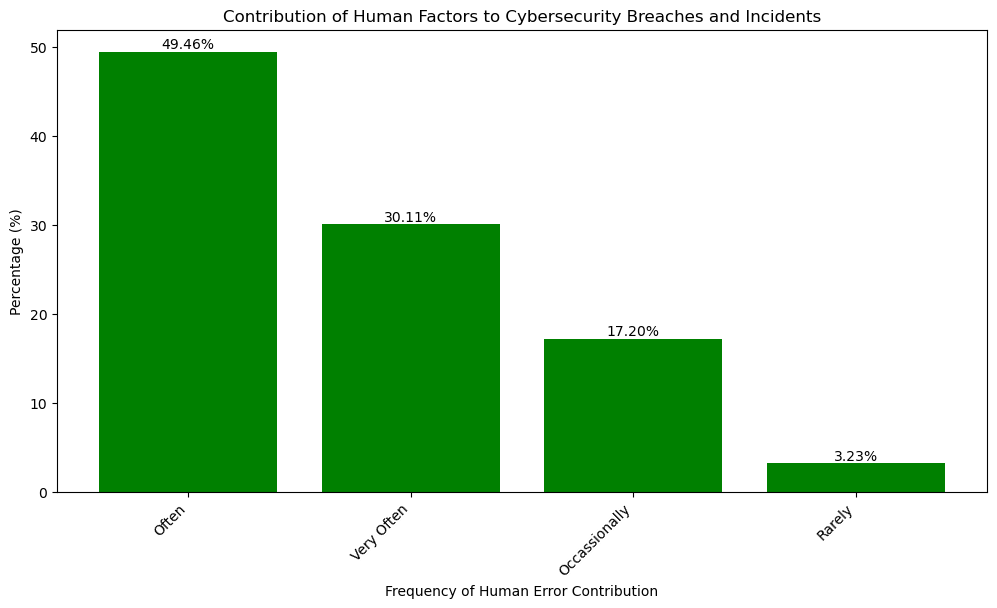

Often: 49.46%
Very Often: 30.11%
Occassionally: 17.20%
Rarely: 3.23%


In [26]:
# Analyse How These Human Factors Contribute to Cybersecurity Breaches and Incidents
breach_contribution_df = Awareness_Newdf['How often does human error contributes to cybersecurity incidents in the organization?']

# Calculate percentage of human factors contributing to cybersecurity breaches
breach_contribution_counts = breach_contribution_df.value_counts()
breach_contribution_percentages = (breach_contribution_counts / breach_contribution_counts.sum()) * 100

# Plot: Contribution of Human Factors to Cybersecurity Breaches and Incidents
plt.figure(figsize=(12, 6))
bars = plt.bar(breach_contribution_percentages.index, breach_contribution_percentages.values, color='Green')
plt.title('Contribution of Human Factors to Cybersecurity Breaches and Incidents')
plt.xlabel('Frequency of Human Error Contribution')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

# Print percentages for analysis
for contribution, percentage in breach_contribution_percentages.items():
    print(f"{contribution}: {percentage:.2f}%")



The Figure "Contribution of Human Factors to Cybersecurity Breaches and Incidents" shows how frequently human error contributes to cybersecurity incidents within the organisation. The x-axis represents the frequency categories, while the y-axis shows the percentage of respondents for each category. The bars are coloured green for clarity, with the height of each bar representing the percentage of respondents.

Key Findings
Frequent Contribution of Human Error:

Nearly half of the respondents (49.46%) indicated that human error "Often" contributes to cybersecurity incidents. This highlights the significant impact of human factors on cybersecurity breaches.
High Frequency of Human Error:

A substantial 30.11% of respondents reported that human error contributes "Very Often" to cybersecurity incidents, emphasising the critical need to address this issue.
Moderate Contribution:

Human error is said to contribute "Occasionally" by 17.20% of respondents, indicating that while less frequent, it is still a notable concern.
Rare Contribution:

Only 3.23% of respondents believe that human error "Rarely" contributes to cybersecurity incidents, suggesting that most employees recognise the recurring nature of human errors.

Human error is a predominant factor in cybersecurity breaches, with a combined 79.57% of respondents indicating that it contributes "Often" or "Very Often". This underscores the necessity for enhanced training, awareness programmes, and robust security policies to mitigate the impact of human factors on cybersecurity.


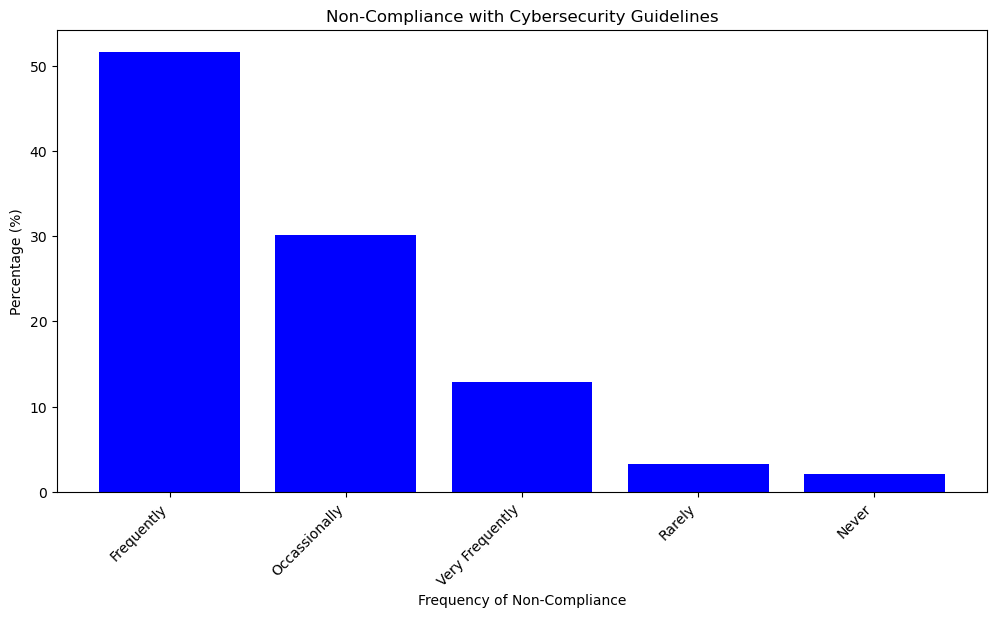

Frequently: 51.61%
Occassionally: 30.11%
Very Frequently: 12.90%
Rarely: 3.23%
Never: 2.15%


In [27]:
# Determine Factors Influencing Compliance or Non-Compliance with Cybersecurity Guidelines
non_compliance_df = Awareness_Newdf['How frequently do you observe employees not following cybersecurity protocols?']

# calculate the percentage of Non-compliance with cybersecuirty guidlines
non_compliance_counts = non_compliance_df.value_counts()
non_compliance_percentages = (non_compliance_counts / non_compliance_counts.sum()) * 100

# Plot Non-Compliance with Cybersecurity Guidelines
plt.figure(figsize=(12, 6))
plt.bar(non_compliance_percentages.index, non_compliance_percentages.values, color='blue')
plt.title('Non-Compliance with Cybersecurity Guidelines')
plt.xlabel('Frequency of Non-Compliance')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print percentages for analysis
for compliance, percentage in non_compliance_percentages.items():
    print(f"{compliance}: {percentage:.2f}%")



The Figure above "Non-Compliance with Cybersecurity Guidelines" illustrates the frequency at which employees are observed not following cybersecurity protocols. The x-axis represents different frequency categories, while the y-axis shows the percentage of respondents for each category. The bars are coloured blue for clarity, with the height of each bar representing the percentage of respondents who reported each level of non-compliance.

Key Findings
Frequent Non-Compliance:

The highest percentage of respondents (51.61%) reported observing non-compliance with cybersecurity guidelines frequently. This indicates a significant issue within the organisation where employees often fail to adhere to security protocols.
Occasional Non-Compliance:

A substantial portion (30.11%) of respondents reported occasional non-compliance. While not as severe as frequent non-compliance, this still represents a notable risk.
Very Frequent Non-Compliance:

12.90% of respondents observed very frequent non-compliance, further underscoring the severity of the issue.
Rare and Never:

Only a small percentage of respondents reported rare (3.23%) or no (2.15%) non-compliance, indicating that nearly all respondents have observed some level of non-compliance.

The high levels of reported non-compliance with cybersecurity guidelines suggest a critical need for improved training, stricter enforcement of protocols, and a culture shift towards prioritising cybersecurity. Addressing these issues can significantly reduce the risk of cybersecurity incidents.

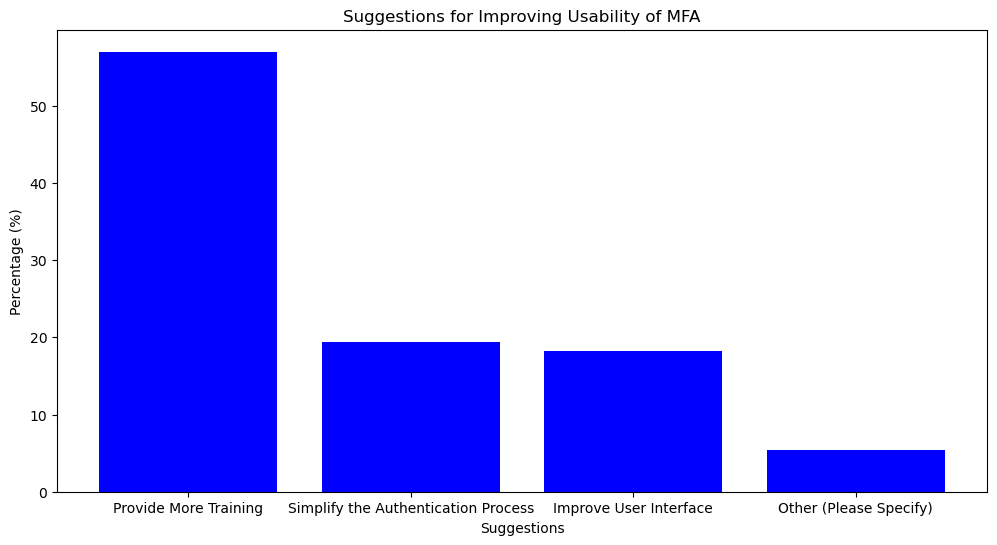

Provide More Training: 56.99%
Simplify the Authentication Process: 19.35%
Improve User Interface: 18.28%
Other (Please Specify): 5.38%


In [28]:
# Obtain MFA Usability Improvement Suggestion
suggestions_df = Awareness_Newdf['What suggestions do you have for improving the usability of MFA in your organization?']

# calcuate the percentage of suggestion for improving usability of Mfa
suggestions_counts = suggestions_df.value_counts()
suggestions_percentages = (suggestions_counts / suggestions_counts.sum()) * 100

# Plot: Practical Interventions for Improving Usability of MFA
plt.figure(figsize=(12, 6))
plt.bar(suggestions_percentages.index, suggestions_percentages.values, color='blue')
plt.title('Suggestions for Improving Usability of MFA')
plt.xlabel('Suggestions')
plt.ylabel('Percentage (%)')
plt.show()

# Print percentages for analysis
for suggestion, percentage in suggestions_percentages.items():
    print(f"{suggestion}: {percentage:.2f}%")


The figure titled "Suggestions for Improving Usability of MFA" illustrates the distribution of suggestions provided by respondents for enhancing the usability of Multi-Factor Authentication (MFA) within the organisation. The x-axis represents different suggestions, while the y-axis shows the percentage of respondents who made each suggestion. The bars are coloured blue for clarity, with the height of each bar representing the percentage of respondents supporting each suggestion.

Key Findings

The majority of respondents (56.99%) suggested that providing more training is crucial for improving the usability of MFA. This indicates a significant need for comprehensive training programs to ensure employees are comfortable and proficient in using MFA.
Simplify the Authentication Process:

A notable portion of respondents (19.35%) recommended simplifying the authentication process. This suggests that the current MFA process may be perceived as complex or cumbersome, and streamlining it could enhance user experience and compliance.
Improve User Interface:

18.28% of respondents indicated that improving the user interface of MFA systems could enhance usability. This highlights the importance of intuitive and user-friendly design in encouraging the adoption of security measures.
Other Suggestions:

A small percentage (5.38%) provided other unspecified suggestions. This indicates that while most respondents focused on training, process simplification, and interface improvements, there are additional areas that may also warrant consideration.
Conclusion
The findings reveal a clear demand for more training, simplification of the authentication process, and improvements to the user interface to enhance the usability of MFA. Addressing these areas can significantly improve user experience and encourage broader adoption of MFA, thereby strengthening the organisation's security posture.

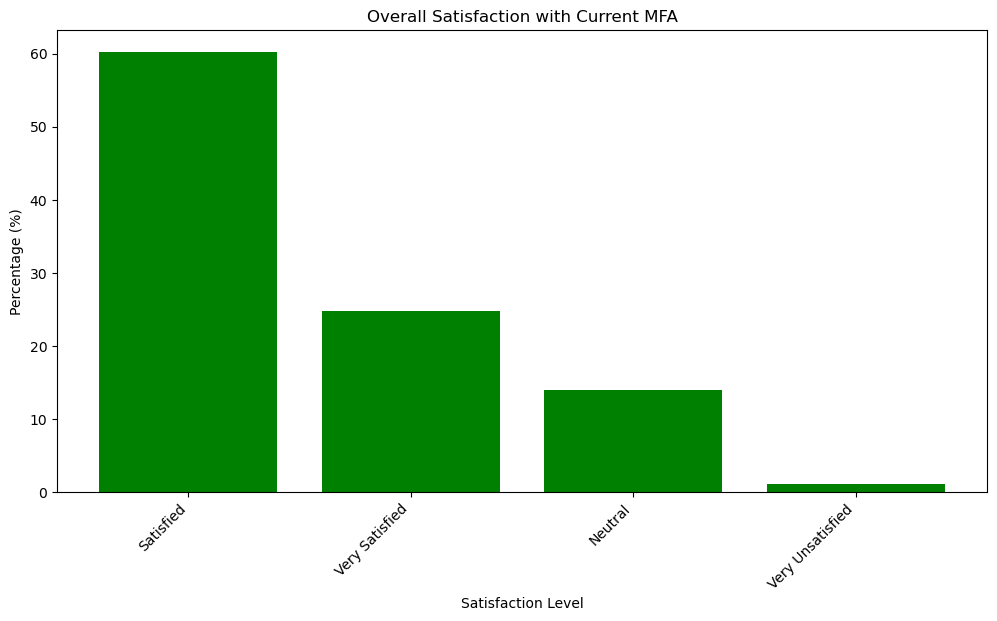

Satisfied: 60.22%
Very Satisfied: 24.73%
Neutral: 13.98%
Very Unsatisfied: 1.08%


In [29]:
# prepare overall satisfaction with current Mfa
satisfaction_df = Awareness_Newdf['How would you rate your overall satisfaction with MFA?']

# calaculate the percenatge of overall satisfaction with current Mfa
satisfaction_counts = satisfaction_df.value_counts()
satisfaction_percentages = (satisfaction_counts / satisfaction_counts.sum()) * 100

# Plot: Satisfaction with Current MFA
plt.figure(figsize=(12, 6))
plt.bar(satisfaction_percentages.index, satisfaction_percentages.values, color='green')
plt.title('Overall Satisfaction with Current MFA')
plt.xlabel('Satisfaction Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print percentages for analysis
for satisfaction, percentage in satisfaction_percentages.items():
    print(f"{satisfaction}: {percentage:.2f}%")


The Figure titled "Overall Satisfaction with Current MFA" illustrates respondents' overall satisfaction levels with the current Multi-Factor Authentication (MFA) system. The x-axis represents different satisfaction levels, while the y-axis shows the percentage of respondents for each level. The bars are coloured green for clarity, with the height of each bar representing the percentage of respondents who reported each level of satisfaction.

Key Findings

The majority of respondents (60.22%) reported being "Satisfied" with the current MFA system. This suggests that the MFA system is generally well-received and meets the needs of most users.
Very Satisfied Respondents:

A significant portion (24.73%) of respondents reported being "Very Satisfied" with the MFA system. This indicates a strong positive reception and highlights that the system is performing well for a substantial number of users.
Neutral Responses:

A smaller group of respondents (13.98%) reported a "Neutral" level of satisfaction. This suggests that while the system is adequate, there may be areas for improvement to convert neutral users into satisfied ones.
Low Dissatisfaction:

Very few respondents (1.08%) reported being "Very Unsatisfied" with the MFA system, indicating minimal dissatisfaction among the user base.
Conclusion
The high levels of satisfaction with the current MFA system indicate its effectiveness and user acceptance. However, the neutral responses suggest that further enhancements could be made to improve user experience. The very low dissatisfaction rate is a positive indicator of the system’s success.

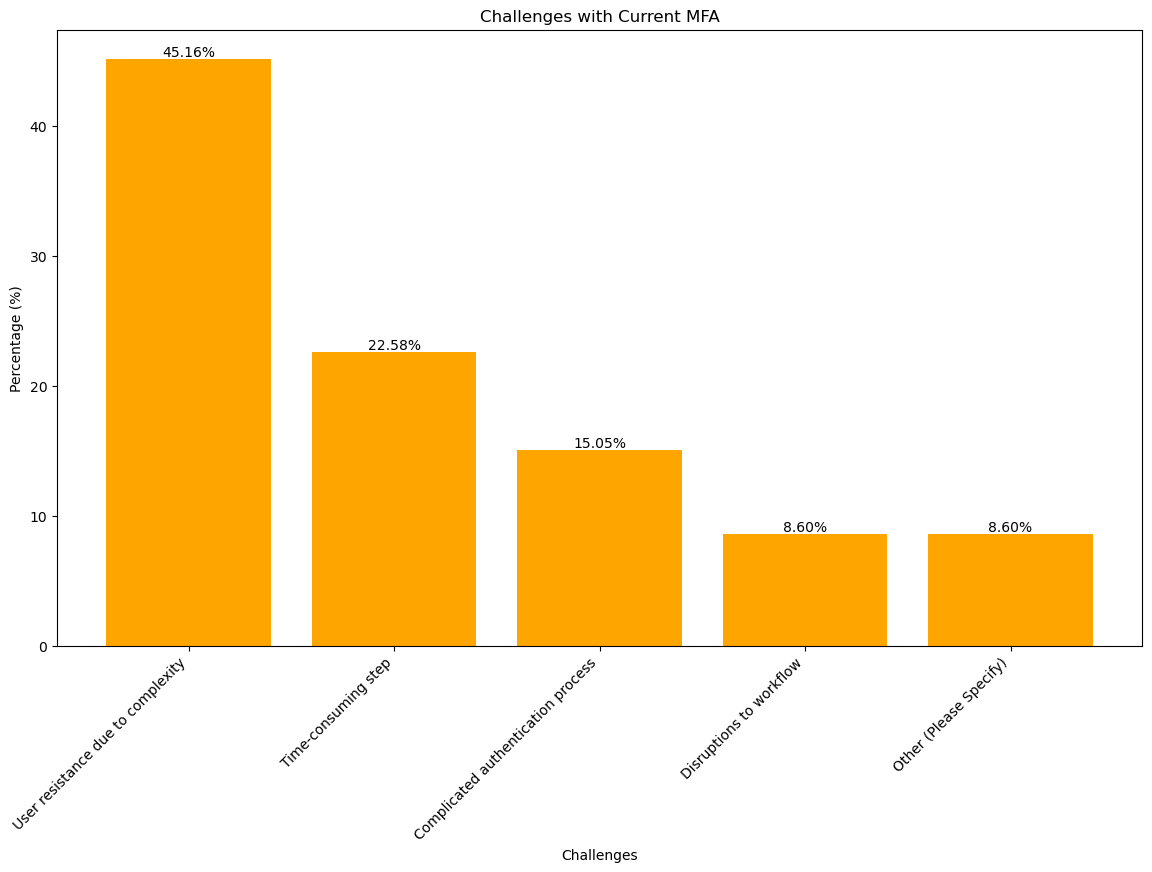

User resistance due to complexity: 45.16%
Time-consuming step: 22.58%
Complicated authentication process: 15.05%
Disruptions to workflow: 8.60%
Other (Please Specify): 8.60%


In [30]:
# Obtain the challenges with current MFA
challenges_df = Awareness_Newdf['What challenges do people encounter regarding MFA in the organization']

# Calculate Challenge Percentages
challenges_counts = challenges_df.value_counts()
challenges_percentages = (challenges_counts / challenges_counts.sum()) * 100

# Plot: Challenges with Current MFA
plt.figure(figsize=(14, 8))
bars = plt.bar(challenges_percentages.index, challenges_percentages.values, color='Orange')
plt.title('Challenges with Current MFA')
plt.xlabel('Challenges')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

# Print percentages for analysis
for challenge, percentage in challenges_percentages.items():
    print(f"{challenge}: {percentage:.2f}%")


The Figure titled "Challenges with Current MFA" illustrates the various challenges that users encounter with the current Multi-Factor Authentication (MFA) system within the organisation. The x-axis represents different challenges, while the y-axis shows the percentage of respondents who identified each challenge. The bars are coloured orange for clarity, with the height of each bar representing the percentage of respondents facing each challenge.

Key Findings
User Resistance Due to Complexity:

The most significant challenge, identified by 45.16% of respondents, is user resistance due to the complexity of the MFA system. This suggests that many users find the MFA process too complicated, leading to resistance and potential non-compliance.
Time-Consuming Steps:

A considerable 22.58% of respondents indicated that the MFA process is time-consuming. This highlights the need for a more streamlined and efficient authentication process to minimise disruption to users' workflows.
Complicated Authentication Process:

15.05% of respondents reported that the authentication process itself is complicated. Simplifying the steps involved in MFA can help alleviate this issue and improve user experience.
Disruptions to Workflow:

Disruptions to workflow were cited by 8.60% of respondents as a challenge. This indicates that the current MFA system may interfere with the smooth execution of work tasks, suggesting a need for better integration of MFA into everyday operations.
Other Challenges:

Another 8.60% of respondents mentioned other unspecified challenges. This suggests there are additional, less common issues that should also be addressed.
Conclusion
The primary challenges with the current MFA system are user resistance due to complexity and time-consuming steps. Addressing these issues by simplifying the authentication process and reducing the time required can significantly improve user satisfaction and compliance.

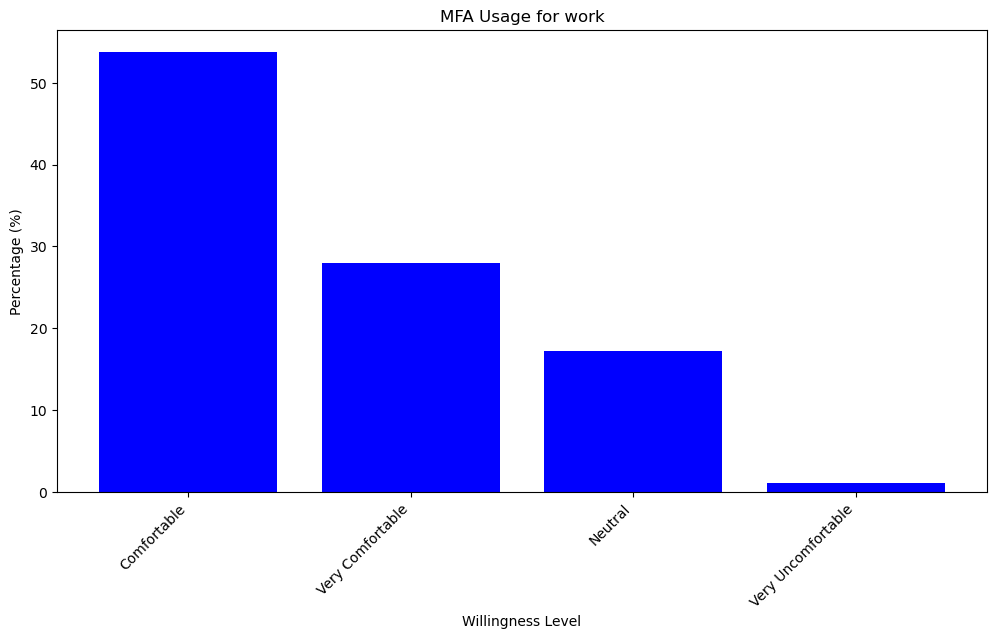

Comfortable: 53.76%
Very Comfortable: 27.96%
Neutral: 17.20%
Very Uncomfortable: 1.08%


In [31]:
# Retrieve MFA Comfort Levels
acceptance_df = Awareness_Newdf['How comfortable are you with using MFA for your work-related accounts?']

# Compute the statics how Mfa usage for work is comfortable.
acceptance_counts = acceptance_df.value_counts()
acceptance_percentages = (acceptance_counts / acceptance_counts.sum()) * 100

# Plot MFA Usage for work
plt.figure(figsize=(12, 6))
plt.bar(acceptance_percentages.index, acceptance_percentages.values, color='blue')
plt.title('MFA Usage for work')
plt.xlabel('Willingness Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print percentages for analysis
for acceptance, percentage in acceptance_percentages.items():
    print(f"{acceptance}: {percentage:.2f}%")


Figure X illustrates the distribution of respondents' comfort levels with using Multi-Factor Authentication (MFA) for their work-related accounts. The x-axis represents different levels of willingness or comfort, while the y-axis shows the percentage of respondents for each level. The bars are coloured in sky blue for clear visibility, with each bar corresponding to a specific comfort level.

Key Findings

The majority of respondents (over 50%) are "Comfortable" with using MFA for their work-related accounts. This indicates a generally positive attitude towards MFA among the participants.
High Comfort Levels:

A significant proportion of respondents (around 30%) are "Very Comfortable" with using MFA. This suggests that a large portion of the workforce not only accepts MFA but also feels very confident in using it.
Neutral and Low Comfort Levels:

Approximately 15% of respondents feel "Neutral" about using MFA. This group might need additional training or support to move towards a more positive stance.
A very small percentage (less than 5%) are "Very Uncomfortable" with using MFA. This indicates a minor segment of the workforce that might have concerns or face challenges with MFA usage.
Detailed Analysis
Comfortable with MFA (Over 50%):

The fact that more than half of the respondents are comfortable with MFA suggests that the organisation has successfully implemented MFA in a manner that is acceptable to most employees. This could be attributed to user-friendly MFA solutions and effective training programmes.
Very Comfortable (Around 30%):

The substantial number of employees who are very comfortable with MFA is a positive sign. It indicates that these employees have likely experienced the benefits of MFA and have integrated it seamlessly into their daily routines. This group can serve as advocates for MFA within the organisation, helping to further its adoption.
Neutral (Around 15%):

The neutral stance of some respondents suggests there is room for improvement in MFA implementation. This group might not fully understand the benefits of MFA or might face occasional usability issues. Addressing these concerns through targeted communication and support can help shift their perception positively.
Very Uncomfortable (Less than 5%):

The small percentage of respondents who are very uncomfortable with MFA indicates that while MFA is generally well-received, there are still some challenges to address. These might include technical difficulties, lack of understanding, or perceived inconvenience. Identifying and mitigating these issues is essential to ensure universal acceptance.
Implications for MFA Implementation
Tailored Training Programmes:

To address the concerns of those who are neutral or uncomfortable with MFA, tailored training programmes should be developed. These programmes can focus on demonstrating the ease of use and security benefits of MFA.
Continuous Feedback and Improvement:

Gathering continuous feedback from employees about their MFA experience can help identify any recurring issues. This feedback should be used to improve the MFA process and address any usability concerns promptly.
Enhanced Communication:

Clear communication about the importance of MFA in protecting organisational assets and personal information can help increase acceptance. Highlighting success stories and positive experiences from peers can also motivate others to embrace MFA.
Conclusion
The analysis of comfort levels with MFA usage for work-related accounts provides valuable insights into employee perceptions and readiness for MFA implementation. The overall positive attitude towards MFA is encouraging, but there is still a need to address the concerns of a small segment of the workforce. By focusing on training, continuous improvement, and effective communication, the organisation can enhance its cybersecurity posture and ensure a higher level of comfort with MFA across all employees.

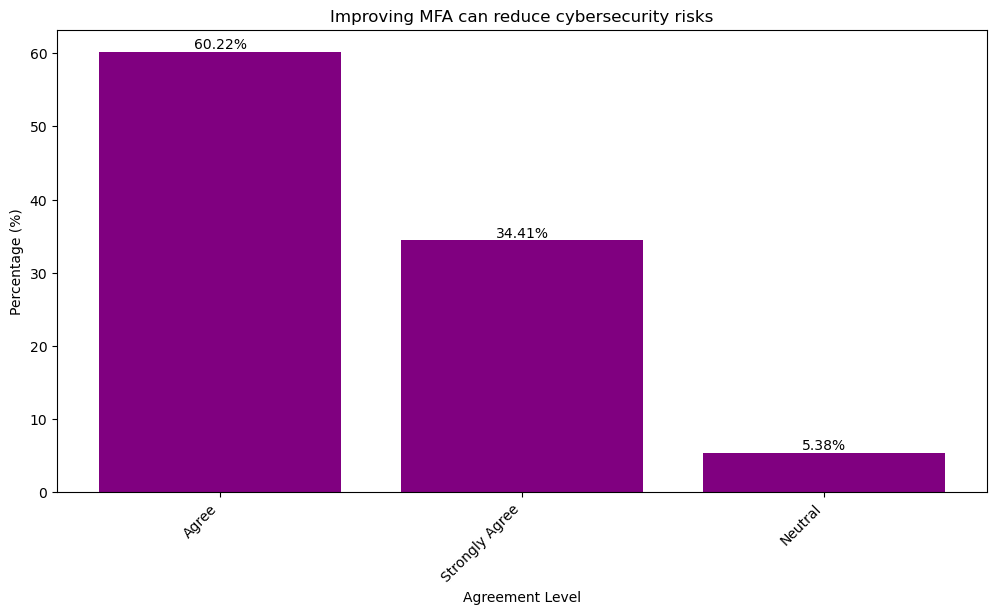

Agree: 60.22%
Strongly Agree: 34.41%
Neutral: 5.38%


In [32]:
# Obtain how improving MFA can reduce cybersecurity risk
security_benefits_df = Awareness_Newdf['Do you believe integrating MFA can significantly reduce cybersecurity risks?']

# Calculate the percentage of security benefits
security_benefits_counts = security_benefits_df.value_counts()
security_benefits_percentages = (security_benefits_counts / security_benefits_counts.sum()) * 100

# Plot: Improving MFA can reduce cybersecurity risks
plt.figure(figsize=(12, 6))
bars = plt.bar(security_benefits_percentages.index, security_benefits_percentages.values, color='Purple')
plt.title('Improving MFA can reduce cybersecurity risks')
plt.xlabel('Agreement Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()

# Print percentages for analysis
for benefit, percentage in security_benefits_percentages.items():
    print(f"{benefit}: {percentage:.2f}%")


The Figure titled "Improving MFA can reduce cybersecurity risks" illustrates the respondents' beliefs regarding the effectiveness of integrating Multi-Factor Authentication (MFA) in significantly reducing cybersecurity risks. The x-axis represents different levels of agreement, while the y-axis shows the percentage of respondents for each level. The bars are coloured purple for clarity, with the height of each bar representing the percentage of respondents who selected each level of agreement.

Key Findings
Agreement with MFA Benefits:

The majority of respondents (60.22%) agree that integrating MFA can significantly reduce cybersecurity risks. This indicates strong confidence among the workforce in the effectiveness of MFA as a security measure.
Strong Agreement:

A substantial 34.41% of respondents strongly agree that MFA can reduce cybersecurity risks, underscoring a high level of trust in MFA's capabilities.
Neutral Responses:

A small percentage (5.38%) of respondents are neutral about the benefits of MFA. This suggests that while most employees see the value in MFA, there is still a minority that may need more information or persuasion about its effectiveness.

The findings demonstrate a strong belief among employees in the effectiveness of MFA to reduce cybersecurity risks, with over 94% of respondents either agreeing or strongly agreeing. This widespread support provides a solid foundation for further integrating and promoting MFA within the organisation.

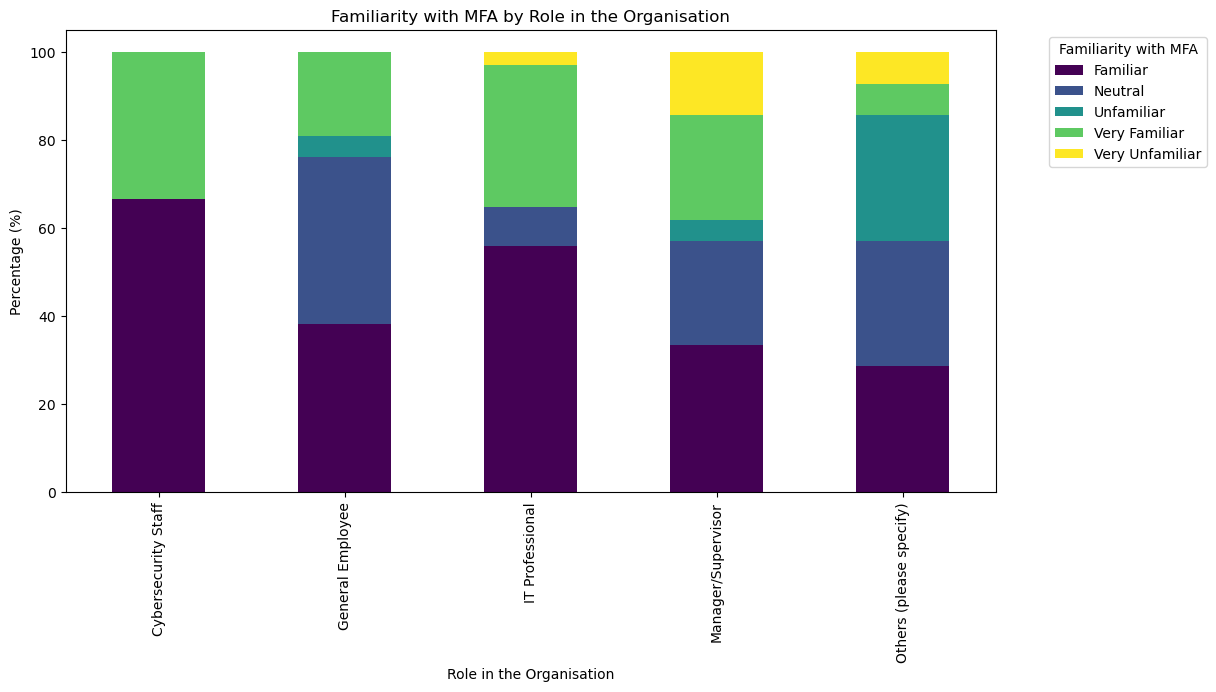

How familiar are you with multi-factor authentication (MFA)?   Familiar  \
Role in the Organisation                                                  
Cybersecurity Staff                                           66.666667   
General Employee                                              38.095238   
IT Professional                                               55.882353   
Manager/Supervisor                                            33.333333   
Others (please specify)                                       28.571429   

How familiar are you with multi-factor authentication (MFA)?    Neutral  \
Role in the Organisation                                                  
Cybersecurity Staff                                            0.000000   
General Employee                                              38.095238   
IT Professional                                                8.823529   
Manager/Supervisor                                            23.809524   
Others (please specify) 

In [33]:
# Familiarity with Mfa by Role in the organisation
awareness_df = Awareness_Newdf[['Role in the Organisation', 'How familiar are you with multi-factor authentication (MFA)?']]

# calculate the percentage of familarity with MFA
# Group by role and MFA familiarity, then count occurrences
role_mfa_counts = awareness_df.groupby(['Role in the Organisation', 'How familiar are you with multi-factor authentication (MFA)?']).size().unstack(fill_value=0)
role_mfa_percentages = role_mfa_counts.div(role_mfa_counts.sum(axis=1), axis=0) * 100

# Plot Familiarity with MFA by Role in the Organisation
role_mfa_percentages.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Familiarity with MFA by Role in the Organisation')
plt.xlabel('Role in the Organisation')
plt.ylabel('Percentage (%)')
plt.legend(title='Familiarity with MFA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print percentages for analysis
print(role_mfa_percentages)


The bar chart titled "Familiarity with MFA by Role in the Organisation" shows the level of familiarity with Multi-Factor Authentication (MFA) across different roles within the organisation. The x-axis represents various roles, while the y-axis shows the percentage of respondents within each role. The stacked bars differentiate between levels of familiarity, ranging from "Very Unfamiliar" to "Very Familiar", with colours provided by the 'viridis' colormap for clarity.

Key Findings
High Familiarity Among Cybersecurity Staff:

A significant portion (66.67%) of Cybersecurity Staff are familiar with MFA, and 33.33% are very familiar. This indicates a strong understanding and use of MFA within this group, which is expected given their role.
General Employees:

General Employees show a varied familiarity with MFA: 38.10% are familiar, 19.05% very familiar, and a notable 38.10% neutral. This suggests a need for further training and awareness programs to increase familiarity.
IT Professionals:

Among IT Professionals, 55.88% are familiar and 32.35% very familiar with MFA. This high level of familiarity is crucial as they often support MFA implementation and troubleshooting.
Managers/Supervisors:

Managers/Supervisors display mixed familiarity: 33.33% familiar, 23.81% neutral, and 23.81% very familiar. There is also a higher percentage of very unfamiliar respondents (14.29%), indicating potential gaps in knowledge.
Others:

The "Others" category shows the most variability, with 28.57% familiar, 28.57% neutral, and a notable 28.57% unfamiliar. This group may include diverse roles that require targeted training efforts.

The data reveals varying levels of MFA familiarity across roles, highlighting the need for tailored training programs. While Cybersecurity Staff and IT Professionals show high familiarity, General Employees, Managers/Supervisors, and Others require more focused efforts to increase their understanding and use of MFA.

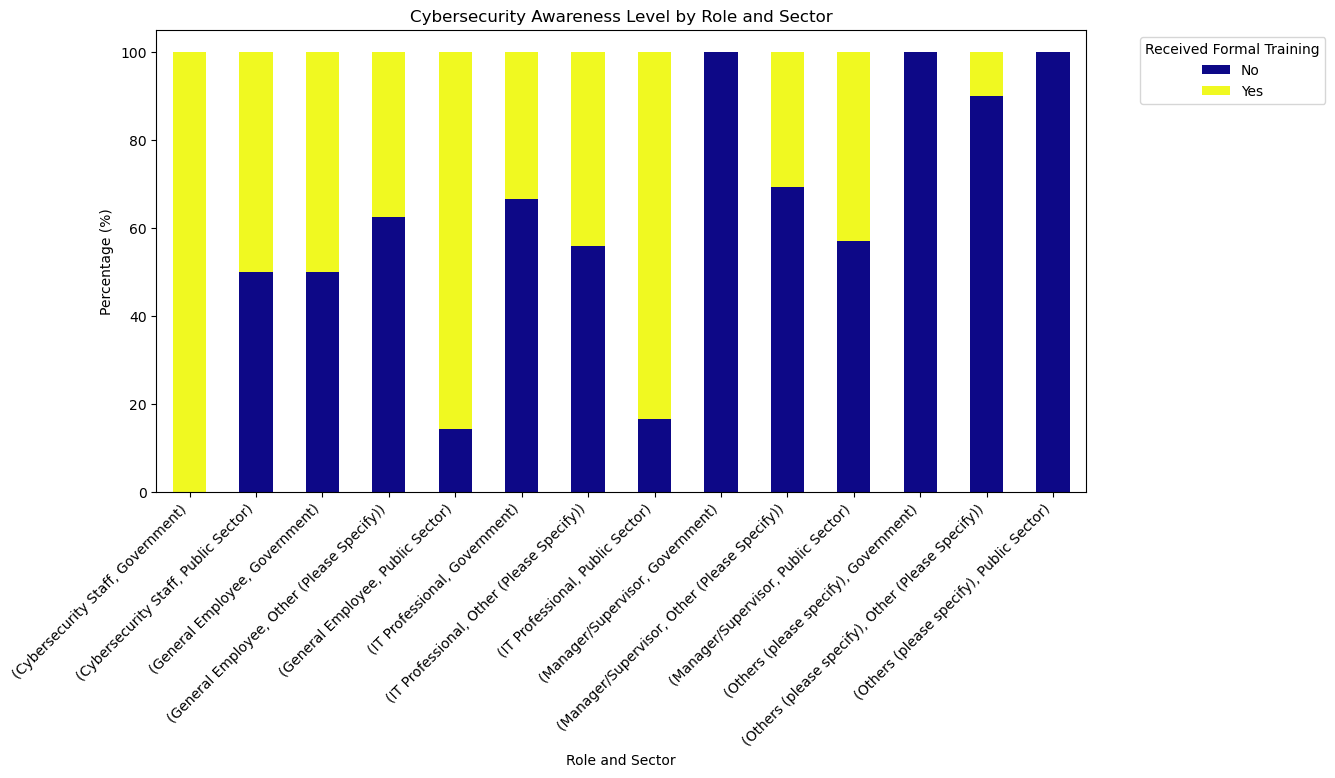

Training                                                No         Yes
Role                    Sector                                        
Cybersecurity Staff     Government                0.000000  100.000000
                        Public Sector            50.000000   50.000000
General Employee        Government               50.000000   50.000000
                        Other (Please Specify)   62.500000   37.500000
                        Public Sector            14.285714   85.714286
IT Professional         Government               66.666667   33.333333
                        Other (Please Specify)   56.000000   44.000000
                        Public Sector            16.666667   83.333333
Manager/Supervisor      Government              100.000000    0.000000
                        Other (Please Specify)   69.230769   30.769231
                        Public Sector            57.142857   42.857143
Others (please specify) Government              100.000000    0.000000
      

In [34]:
# cybersecurity Awaureness level by role and sector visualisation
awareness_df = Awareness_Newdf[['Role in the Organisation', 'Which sector do you organization belong to?', 'Have you received any formal training on cybersecurity in the past year?']]

# Rename columns for easier reference
awareness_df.columns = ['Role', 'Sector', 'Training']

# Group by role and sector, then count occurrences of training responses
grouped_counts = awareness_df.groupby(['Role', 'Sector', 'Training']).size().unstack(fill_value=0)

# Calculate percentages within each group
grouped_percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# Plot Cybersecurity Awareness Level by Role and Sector
fig, ax = plt.subplots(figsize=(12, 6))
grouped_percentages.plot(kind='bar', stacked=True, ax=ax, colormap='plasma')
plt.title('Cybersecurity Awareness Level by Role and Sector')
plt.xlabel('Role and Sector')
plt.ylabel('Percentage (%)')
plt.legend(title='Received Formal Training', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print percentages for analysis
print(grouped_percentages)


Cybersecurity Awareness Level by Role and Sector
figure X illustrates the percentage distribution of respondents who have received formal training on cybersecurity across different roles and sectors. Each bar represents a specific combination of role and sector, with segments indicating whether respondents have received formal training (Yes or No).

Key Observations incudes 

In the government sector, all cybersecurity staff (100%) have received formal training. This suggests a strong emphasis on training for cybersecurity roles within the government.
In the public sector, the cybersecurity staff are evenly split, with 50% having received formal training and 50% not having received it.
General Employees:

General employees in the government sector show an equal split, with 50% having received formal training and 50% not.
A significant majority of general employees in the public sector (85.71%) have received formal training, indicating a robust training initiative in this sector.

Among general employees in other specified sectors, 37.5% have received formal training, while 62.5% have not, suggesting a potential area for improvement in training programs.
IT Professionals:

In the government sector, a larger proportion of IT professionals (66.67%) have not received formal training, with only 33.33% having received it. This highlights a potential gap in training for IT professionals within the government.
In the public sector, a majority of IT professionals (83.33%) have received formal training, indicating a strong training focus in this area.

In other specified sectors, 44% of IT professionals have received formal training, compared to 56% who have not, suggesting room for improvement.

None of the managers/supervisors in the government sector have received formal training, highlighting a significant gap in training for leadership roles.

In the public sector, 42.86% of managers/supervisors have received formal training, while 57.14% have not.
In other specified sectors, 30.77% of managers/supervisors have received formal training, with the majority (69.23%) not having received it.
Others (Please Specify):

In the government sector, none of the respondents classified as "Others" have received formal training, indicating a potential area for improvement.
Similarly, in the public sector, none of the "Others" have received formal training.
In other specified sectors, 10% of "Others" have received formal training, while 90% have not, highlighting a significant training gap in these roles.
Insights
High Training Rates in Public Sector:

Both general employees and IT professionals in the public sector show high rates of formal cybersecurity training, suggesting strong training programs in these roles.
Discrepancies in Training Across Roles:

While cybersecurity staff in the government sector are well-trained, there are significant gaps for IT professionals and managers/supervisors in the same sector.
The complete lack of formal training among managers/supervisors in the government sector highlights a critical area that needs attention.
Need for Targeted Training Programs:

The data indicates a need for targeted training programs, especially for roles that are underrepresented in training, such as managers/supervisors and "Others" in various sectors.
Addressing these gaps can enhance overall cybersecurity awareness and resilience across different sectors and roles.

The analysis reveals important insights into the distribution of formal cybersecurity training across various roles and sectors. While some areas, particularly in the public sector, demonstrate strong training initiatives, there are notable gaps in other areas. These insights can guide the development of more focused and effective training programs to improve cybersecurity awareness and preparedness throughout the organization.

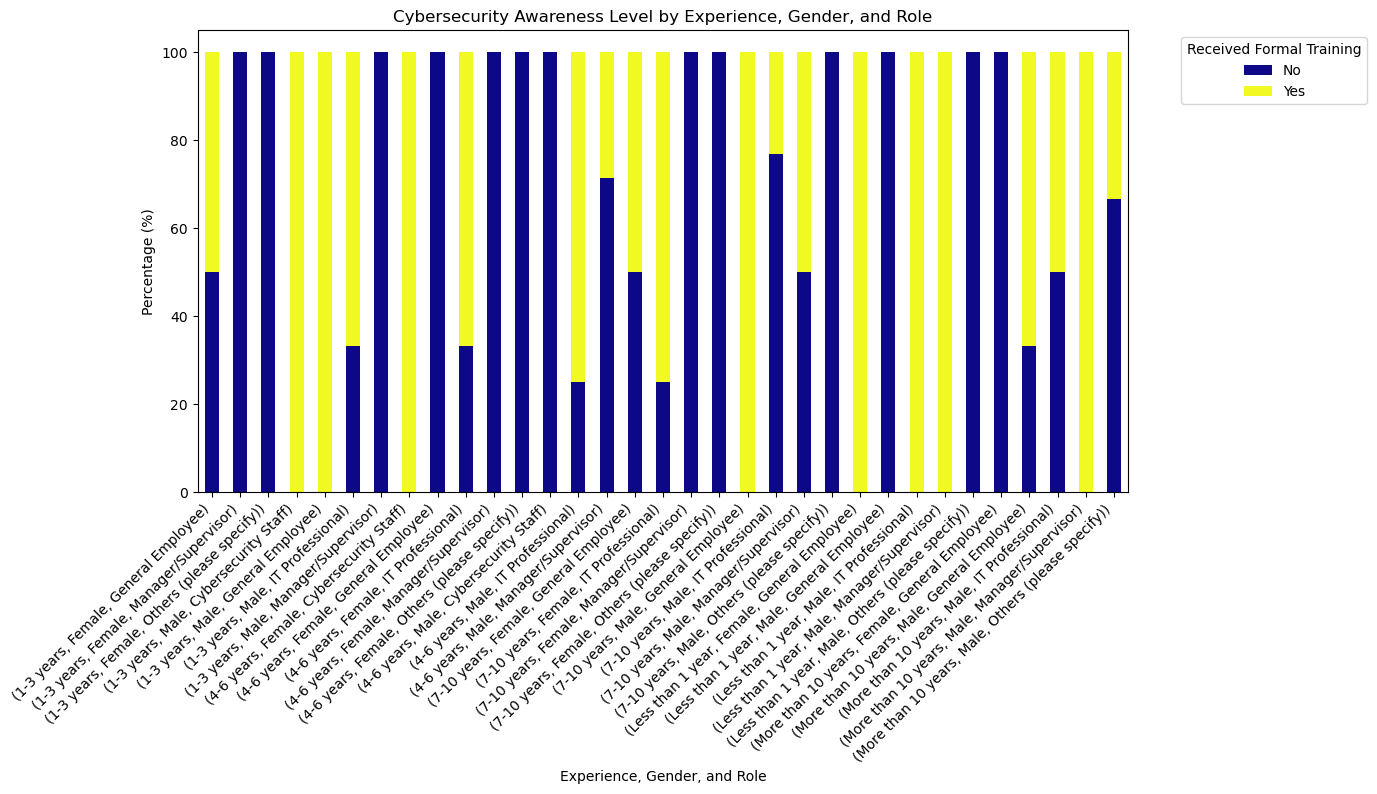

Training                                                   No         Yes
Experience         Gender Role                                           
1-3 years          Female General Employee          50.000000   50.000000
                          Manager/Supervisor       100.000000    0.000000
                          Others (please specify)  100.000000    0.000000
                   Male   Cybersecurity Staff        0.000000  100.000000
                          General Employee           0.000000  100.000000
                          IT Professional           33.333333   66.666667
                          Manager/Supervisor       100.000000    0.000000
4-6 years          Female Cybersecurity Staff        0.000000  100.000000
                          General Employee         100.000000    0.000000
                          IT Professional           33.333333   66.666667
                          Manager/Supervisor       100.000000    0.000000
                          Others (plea

In [35]:
# cybersecurity awareness evel by experience , gender and role
awareness_df = Awareness_Newdf[['Years of experience in the current role', 'Gender', 'Role in the Organisation', 'Have you received any formal training on cybersecurity in the past year?']]

# Rename columns for easier reference
awareness_df.columns = ['Experience', 'Gender', 'Role', 'Training']

# Group by experience, gender, role, then count occurrences of training responses
grouped_counts = awareness_df.groupby(['Experience', 'Gender', 'Role', 'Training']).size().unstack(fill_value=0)

# Calculate percentages within each group
grouped_percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# Plot Cybersecurity Awareness Level by Experience, Gender, and Role
fig, ax = plt.subplots(figsize=(12, 6))
grouped_percentages.plot(kind='bar', stacked=True, ax=ax, colormap='plasma')
plt.title('Cybersecurity Awareness Level by Experience, Gender, and Role')
plt.xlabel('Experience, Gender, and Role')
plt.ylabel('Percentage (%)')
plt.legend(title='Received Formal Training', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print percentages for analysis
print(grouped_percentages)



The Figure titled "Cybersecurity Awareness Level by Experience, Gender, and Role" illustrates the percentage of respondents who have received formal training on cybersecurity across different combinations of experience, gender, and role within the organisation. The x-axis represents different combinations of these factors, while the y-axis shows the percentage of respondents. The stacked bars differentiate between those who have and have not received formal training, with colours provided by the 'plasma' colormap.

Key Findings


Cybersecurity staff generally show high levels of formal training, particularly males with 1-3 years of experience and females with 4-6 years of experience. This is expected given the nature of their role.
Variability Among General Employees:

General Employees display variability in training based on gender and experience. For instance, females with more than 10 years of experience mostly have no training, while males with 1-3 years of experience have high training rates.
Training Among IT Professionals:

IT Professionals also show varied training levels. For example, males with 7-10 years of experience are mostly trained, whereas females with similar experience levels are less consistently trained.
Managers/Supervisors:

Managers/Supervisors, particularly females, often lack formal training. Males with 4-6 years of experience show some training, but overall, this group has lower training rates compared to others.
Other Roles:

The "Others" category shows high training variability, indicating diverse roles and potentially differing access to training opportunities.

The data reveals significant variability in formal cybersecurity training across different combinations of experience, gender, and role. Cybersecurity staff and IT professionals generally have higher training levels, whereas managers/supervisors and general employees show more variability. Targeted training programs addressing these disparities can enhance overall cybersecurity awareness within the organisation.

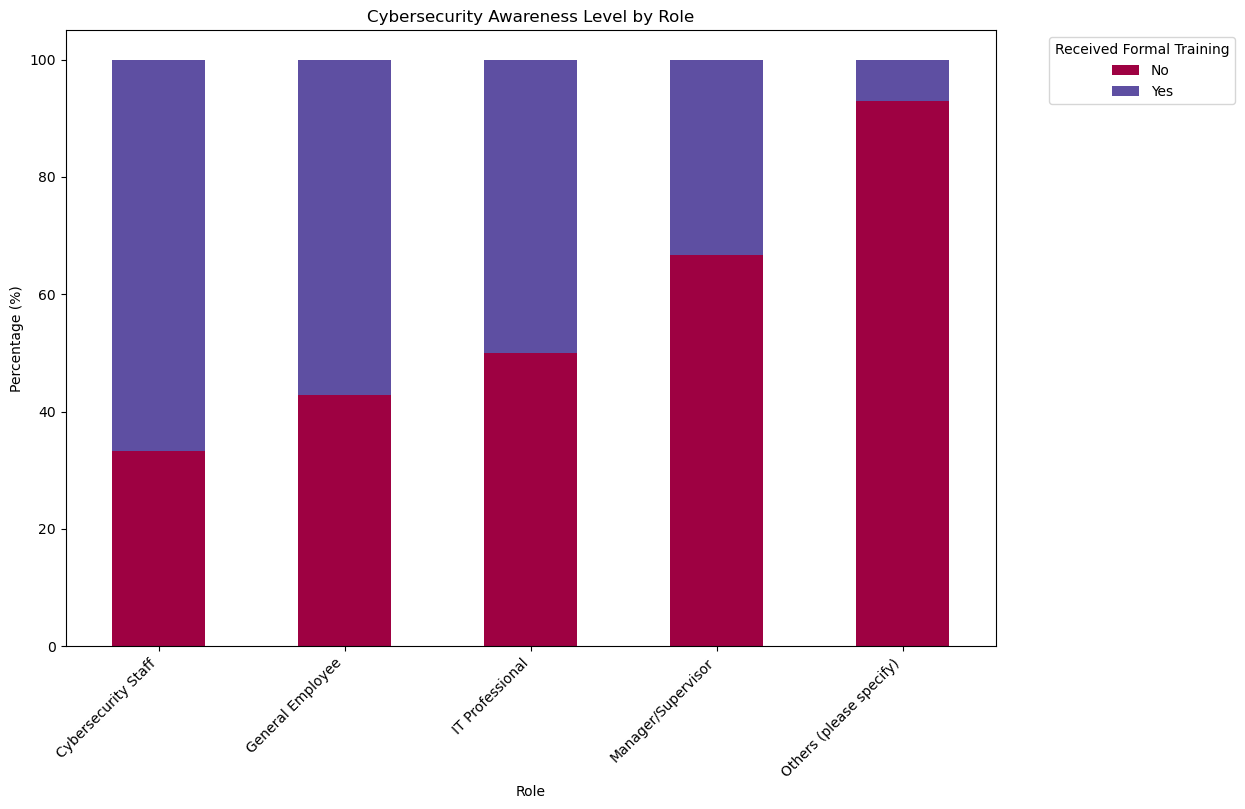

Training                        No        Yes
Role                                         
Cybersecurity Staff      33.333333  66.666667
General Employee         42.857143  57.142857
IT Professional          50.000000  50.000000
Manager/Supervisor       66.666667  33.333333
Others (please specify)  92.857143   7.142857


In [36]:
# visualising cybersecurity awareness level by role
awareness_df = Awareness_Newdf[['Role in the Organisation', 'Have you received any formal training on cybersecurity in the past year?']]

# Rename columns 
awareness_df.columns = ['Role', 'Training']

# Group by role, then count occurrences of training responses
grouped_counts = awareness_df.groupby(['Role', 'Training']).size().unstack(fill_value=0)

# Calculate percentages within each group
grouped_percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# Plot Cybersecurity Awareness Level by Role
fig, ax = plt.subplots(figsize=(12, 8))
grouped_percentages.plot(kind='bar', stacked=True, ax=ax, colormap='Spectral')
plt.title('Cybersecurity Awareness Level by Role')
plt.xlabel('Role')
plt.ylabel('Percentage (%)')
plt.legend(title='Received Formal Training', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print percentages for analysis
print(grouped_percentages)


The Figure titled "Cybersecurity Awareness Level by Role" illustrates the percentage of respondents who have received formal training on cybersecurity in the past year, broken down by their roles within the organisation. The x-axis represents different roles, while the y-axis shows the percentage of respondents. The stacked bars differentiate between those who have and have not received formal training, with colours provided by the 'Spectral' colormap for clarity.

Key Findings

A significant majority (66.67%) of Cybersecurity Staff have received formal training on cybersecurity, reflecting the importance of continuous training in this critical role.
General Employees:

General Employees also show a relatively high level of training, with 57.14% having received formal training. This indicates a good level of awareness among this group, although there is still room for improvement.
IT Professionals:

IT Professionals have an equal distribution of formal training, with 50% having received training. This highlights the need for more consistent training efforts within this group.
Managers/Supervisors:

A significant portion (66.67%) of Managers/Supervisors have not received formal training, suggesting a gap in cybersecurity awareness at the leadership level. This is a critical area that needs addressing to ensure effective governance and oversight.
Other Roles:

The "Others" category shows the highest percentage of respondents without formal training (92.86%), indicating a substantial gap in training for these roles.

The data highlights the need for targeted training programs, especially for Managers/Supervisors and other unspecified roles. Ensuring consistent and comprehensive training across all roles can significantly enhance the organisation's overall cybersecurity posture.

In [37]:
print(Awareness_Newdf.columns)

Index(['Age Group', 'Gender', 'Role in the Organisation',
       'Years of experience in the current role',
       'Which sector do you organization belong to?',
       'Have you received any formal training on cybersecurity in the past year?',
       'How often does human error contributes to cybersecurity incidents in the organization?',
       'What are the most significant human factors contributing to cybersecurity breaches in your organisation? Please select one',
       'To what extent do you agree that negligence is a significant factor in cybersecurity breaches?',
       'How frequently do you observe employees not following cybersecurity protocols?',
       'Does the organization currently use multi-factor authentication (MFA) for accessing systems?',
       'How familiar are you with multi-factor authentication (MFA)?',
       'Do you believe integrating MFA can significantly reduce cybersecurity risks?',
       'How comfortable are you with using MFA for your work-related a

Age Group Statistics
           Frequency  Percentage
Age Group                       
35-44             75   80.645161
25-34             12   12.903226
45-54              6    6.451613

Gender Statistics
        Frequency  Percentage
Gender                       
Male           64   68.817204
Female         29   31.182796

Role in the Organisation Statistics
                          Frequency  Percentage
Role in the Organisation                       
IT Professional                  34   36.559140
General Employee                 21   22.580645
Manager/Supervisor               21   22.580645
Others (please specify)          14   15.053763
Cybersecurity Staff               3    3.225806

Years of Experience Statistics
                                         Frequency  Percentage
Years of experience in the current role                       
7-10 years                                      35   37.634409
4-6 years                                       23   24.731183
More than 10 years

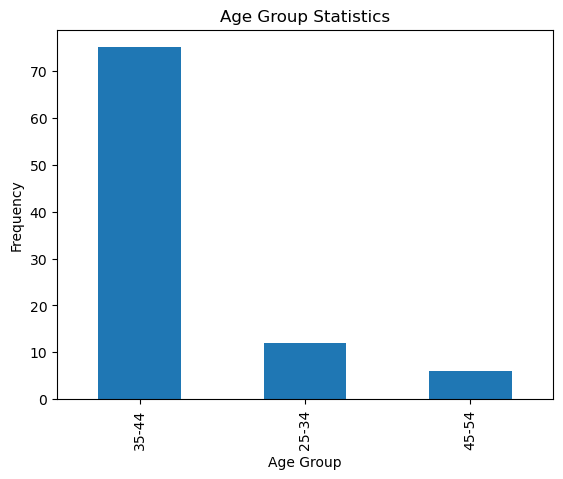

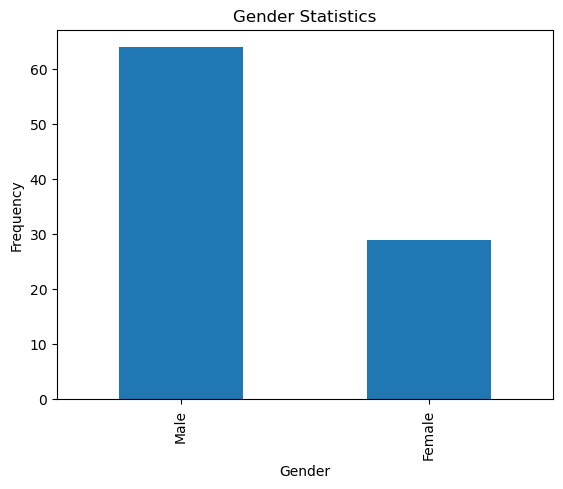

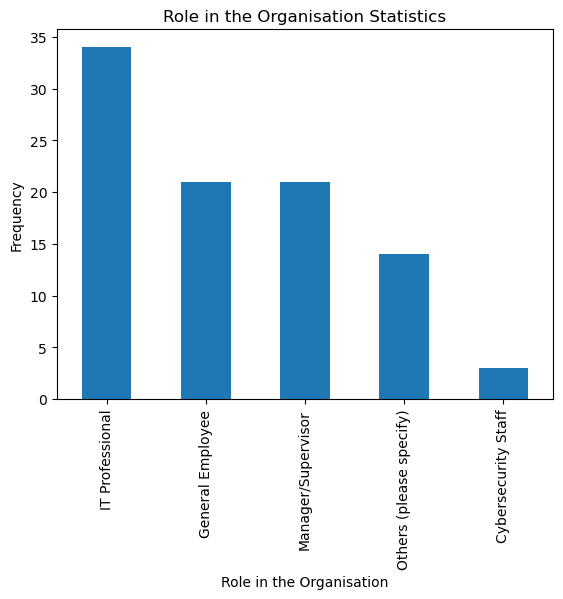

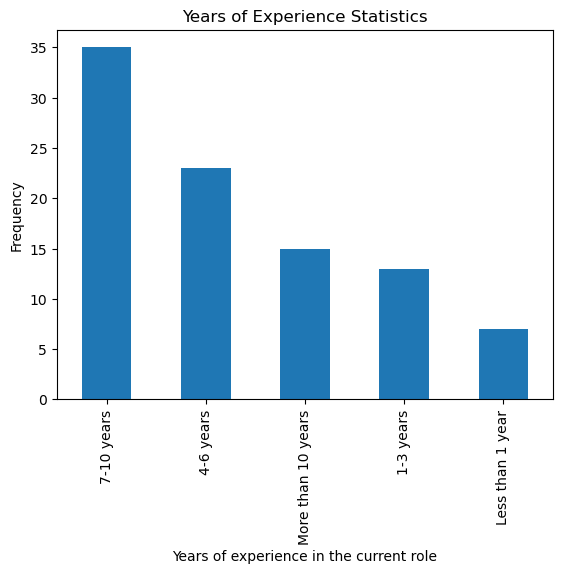

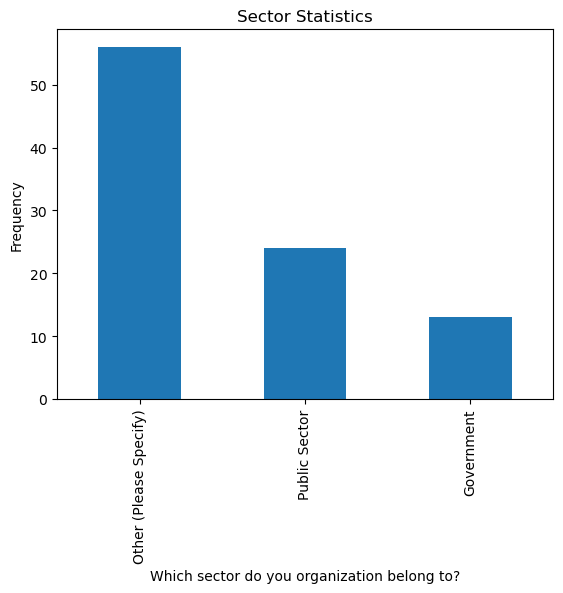

In [38]:
# calculate frequency and percentage of demographic
def calculate_frequency_percentage(column):
    frequency = Awareness_Newdf[column].value_counts()
    percentage = (frequency / frequency.sum()) * 100
    return pd.DataFrame({'Frequency': frequency, 'Percentage': percentage})

# Calculate statistics for each demographic characteristic
age_group_stats = calculate_frequency_percentage('Age Group')
gender_stats = calculate_frequency_percentage('Gender')
role_stats = calculate_frequency_percentage('Role in the Organisation')
experience_stats = calculate_frequency_percentage('Years of experience in the current role')
sector_stats = calculate_frequency_percentage('Which sector do you organization belong to?')

# Display the results
print("Age Group Statistics")
print(age_group_stats)
print("\nGender Statistics")
print(gender_stats)
print("\nRole in the Organisation Statistics")
print(role_stats)
print("\nYears of Experience Statistics")
print(experience_stats)
print("\nSector Statistics")
print(sector_stats)

# Optional: Visualising the results with bar plots
def plot_stats(df, title):
    df.plot(kind='bar', y='Frequency', legend=False)
    plt.title(title)
    plt.ylabel('Frequency')
    plt.show()

plot_stats(age_group_stats, 'Age Group Statistics')
plot_stats(gender_stats, 'Gender Statistics')
plot_stats(role_stats, 'Role in the Organisation Statistics')
plot_stats(experience_stats, 'Years of Experience Statistics')
plot_stats(sector_stats, 'Sector Statistics')


In [39]:
# Select relevant columns for analysis
survey_columns = [col for col in Awareness_df.columns if col.startswith('Q')]
selectedcolumns_df = Awareness_df[survey_columns]

In [40]:
# Remove metadata rows (first two rows in this case)
Awarenesscleaned_df = selectedcolumns_df.iloc[2:].reset_index(drop=True)

In [41]:
# Handle missing values by filling with the mode
Awarenesscleaned_df.fillna(Awarenesscleaned_df.mode().iloc[0], inplace=True)

In [42]:
# Convert categorical variables to numerical values using one-hot encoding
encoded_df = pd.get_dummies(Awarenesscleaned_df)

In [43]:
# Define the target variable (e.g., Q21_Likely)
target = 'Q21_Likely'

In [44]:
# Split the data into features and target
X = encoded_df.drop(columns=[target])
y = encoded_df[target]

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Make predictions
y_pred = model.predict(X_test)

In [48]:
# Evaluate the model
report = classification_report(y_test, y_pred)

In [49]:
print(report)

              precision    recall  f1-score   support

       False       1.00      0.89      0.94         9
        True       0.91      1.00      0.95        10

    accuracy                           0.95        19
   macro avg       0.95      0.94      0.95        19
weighted avg       0.95      0.95      0.95        19



In [50]:
!pip install opencv-python
!pip install opencv-python-headless



In [51]:
import cv2


In [52]:
import os

# Directory where images are stored
image_dir = 'person.jpg'  # Change this to the actual directory

# List of user IDs corresponding to the images
# Ensure that these user IDs match the filenames in your image directory
users = ['user1']  # Add all user IDs

# Create a mapping of user IDs to image paths
user_images = {user: os.path.join(image_dir, f'{user}.jpg') for user in users}

# Print the mapping to verify
for user, image_path in user_images.items():
    print(f"User: {user}, Image Path: {'person.jpg'}")


User: user1, Image Path: person.jpg


In [53]:
# Function to extract facial features using OpenCV
def extract_facial_features(image_path):
    try:
        # Load the Haar cascade for face detection
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        
        # Read the image
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Unable to read image at {image_path}")
            return None

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
        
        # If at least one face is detected, extract the features of the first face
        if len(faces) > 0:
            x, y, w, h = faces[0]
            face = gray[y:y+h, x:x+w]
            face = cv2.resize(face, (224, 224))
            return face.flatten()
        else:
            print(f"No face detected in image at {image_path}")
            return None
    except Exception as e:
        print(f"Error processing image at {image_path}: {e}")
        return None

# Path to the single image
image_path = 'person.jpg' 


In [54]:

# Extract facial features from the single image
features = extract_facial_features(image_path)
if features is not None:
    print(f"Extracted features: {features[:10]}")  # Print first 10 features for brevity
else:
    print("Failed to extract features.")

# Assuming 'encoded_df' is your preprocessed survey data DataFrame
# Create a DataFrame for the facial features repeated for each row in the survey data
num_rows = len(encoded_df)
facial_features_df = pd.DataFrame([features] * num_rows)

# Combine the survey data with facial features
combined_features = pd.concat([encoded_df, facial_features_df], axis=1)

# Ensure all column names are strings
combined_features.columns = combined_features.columns.astype(str)

# Define the target variable (e.g., Q21_Likely)
target = 'Q21_Likely'

# Split the data into features and target
X = combined_features.drop(columns=[target])
y = combined_features[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)

print(report)


Extracted features: [24 22 20 16 16 19 19 21 24 22]
              precision    recall  f1-score   support

       False       0.67      0.89      0.76         9
        True       0.86      0.60      0.71        10

    accuracy                           0.74        19
   macro avg       0.76      0.74      0.73        19
weighted avg       0.77      0.74      0.73        19



In [59]:
# Print the column names to identify any discrepancies
print(encoded_df.columns)


Index(['Q1_25-34', 'Q1_35-44', 'Q1_45-54', 'Q2_Female', 'Q2_Male',
       'Q3_Cybersecurity Staff', 'Q3_General Employee', 'Q3_IT Professional',
       'Q3_Manager/Supervisor', 'Q3_Others (please specify)', 'Q4_1-3 years',
       'Q4_4-6 years', 'Q4_7-10 years', 'Q4_Less than 1 year',
       'Q4_More than 10 years', 'Q5_Government', 'Q5_Other (Please Specify)',
       'Q5_Public Sector', 'Q7_No', 'Q7_Yes', 'Q8_Occassionally', 'Q8_Often',
       'Q8_Rarely', 'Q8_Very Often', 'Q9_Insufficient Training',
       'Q9_Lack of Awareness', 'Q9_Negligence with security practices',
       'Q10_Agree', 'Q10_Neutral', 'Q10_Strongly Agree',
       'Q10_Strongly Disagree', 'Q11_Frequently', 'Q11_Never',
       'Q11_Occassionally', 'Q11_Rarely', 'Q11_Very Frequently', 'Q12_No',
       'Q12_Yes', 'Q13_Familiar', 'Q13_Neutral', 'Q13_Unfamiliar',
       'Q13_Very Familiar', 'Q13_Very Unfamiliar', 'Q14_Agree', 'Q14_Neutral',
       'Q14_Strongly Agree', 'Q15_Comfortable', 'Q15_Neutral',
       'Q15_Very 

In [60]:
# Define the target variable
target = 'Q21_Likely'

# Split the data into features and target
X = encoded_df.drop(columns=[target])
y = encoded_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

       False       1.00      0.89      0.94         9
        True       0.91      1.00      0.95        10

    accuracy                           0.95        19
   macro avg       0.95      0.94      0.95        19
weighted avg       0.95      0.95      0.95        19

